# Análise Estatística do ENEM

Projeto da Semana 5 da jornada DataScienceJourney.

Objetivo: aplicar conceitos de estatística descritiva e análise exploratória
em dados educacionais do ENEM, buscando padrões, distribuições e relações
entre variáveis.


---
## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

---
## Carregamento do dataset

In [2]:
df = pd.read_csv(
    "data/enem_2019_sample.csv",
    sep=",",
    encoding="latin1",
    low_memory=False
)

---
## Exploração Inicial dos Dados

In [3]:
df.shape

(127380, 136)

In [4]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025'],
      dtype='object', length=136)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(24), int64(71), object(41)
memory usage: 132.2+ MB


---
## Seleção das Variáveis de Interesse

In [6]:
colunas_estatistica = [
    "NU_NOTA_CN",
    "NU_NOTA_CH",
    "NU_NOTA_LC",
    "NU_NOTA_MT",
    "NU_NOTA_REDACAO",
    "TP_SEXO",
    "TP_ESCOLA"
]

df_stats = df[colunas_estatistica].copy()

In [7]:
df_stats.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO,TP_ESCOLA
0,435.6,512.3,488.6,432.4,420.0,M,1
1,NaN,409.3,375.3,NaN,400.0,M,1
2,423.2,499.1,441.0,427.2,560.0,F,1
3,426.2,578.1,551.5,499.9,500.0,F,1
4,516.5,571.3,511.2,424.5,780.0,F,1


---
## Verificando valores ausentes

In [8]:
df_stats.isnull().sum().sort_values(ascending=False)

NU_NOTA_CN         34622
NU_NOTA_MT         34622
NU_NOTA_CH         29337
NU_NOTA_LC         29337
NU_NOTA_REDACAO    29337
TP_SEXO                0
TP_ESCOLA              0
dtype: int64

---
## Estatística Descritiva

In [9]:
df_stats.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ESCOLA
count,92758.000000,98043.000000,98043.000000,92758.000000,98043.000000,127380.000000
mean,477.964015,507.365912,520.463928,523.555206,571.570025,1.330515
std,76.296099,82.972839,64.556578,109.416939,188.076455,0.555043
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,418.000000,447.900000,483.700000,435.300000,480.000000,1.000000
50%,470.200000,510.900000,526.100000,501.600000,580.000000,1.000000
75%,533.300000,567.100000,565.100000,598.200000,680.000000,2.000000
max,797.300000,809.400000,801.700000,985.000000,1000.000000,3.000000


---
## Definição estatística da amostra

In [10]:
mt = df_stats["NU_NOTA_MT"].dropna()
lc = df_stats["NU_NOTA_LC"].dropna()
cn = df_stats["NU_NOTA_CN"].dropna()
ch = df_stats["NU_NOTA_CH"].dropna()

---
## Média vs Mediana

In [11]:
estatisticas = pd.DataFrame({
    "Média": [mt.mean(), lc.mean(), cn.mean(), ch.mean()],
    "Mediana": [mt.median(), lc.median(), cn.median(), ch.median()]
}, index=["Matemática", "Linguagens", "Natureza", "Humanas"])

estatisticas

,Média,Mediana
Matemática,523.555206,501.6
Linguagens,520.463928,526.1
Natureza,477.964015,470.2
Humanas,507.365912,510.9


## 📊 Análise – Média vs Mediana

A comparação entre média e mediana permite identificar indícios de assimetria na distribuição das notas.

### 🔎 Resultados observados:

- **Matemática**  
  Média (523,56) > Mediana (501,6)

- **Linguagens**  
  Média (520,46) < Mediana (526,1)

- **Ciências da Natureza**  
  Média (477,96) > Mediana (470,2)

- **Ciências Humanas**  
  Média (507,37) < Mediana (510,9)

---

### 📈 Interpretação Estatística

Em **Matemática** e **Ciências da Natureza**, a média é superior à mediana.  
Isso sugere **assimetria positiva (cauda à direita)**, indicando que há candidatos com notas mais altas puxando a média para cima.

Já em **Linguagens** e **Ciências Humanas**, a mediana é superior à média.  
Esse comportamento sugere **leve assimetria negativa (cauda à esquerda)**, possivelmente influenciada por notas mais baixas impactando a média.

---

### 🧠 Comparação entre as provas

Matemática apresenta a **maior diferença absoluta entre média e mediana**, o que pode indicar maior variabilidade ou presença mais relevante de notas extremas.

Natureza também demonstra assimetria positiva, porém de forma menos intensa.

Linguagens e Humanas apresentam comportamento semelhante entre si, com distribuição aparentemente mais equilibrada, porém com leve tendência à assimetria negativa.

---

### 🎯 Conclusão Parcial

A análise inicial sugere que as distribuições das provas não são perfeitamente simétricas e que o comportamento das notas varia entre as áreas do conhecimento.

Essa diferença estrutural entre as provas será melhor compreendida com a visualização das distribuições (histogramas) e análise de dispersão (boxplots).


---
## Histogramas

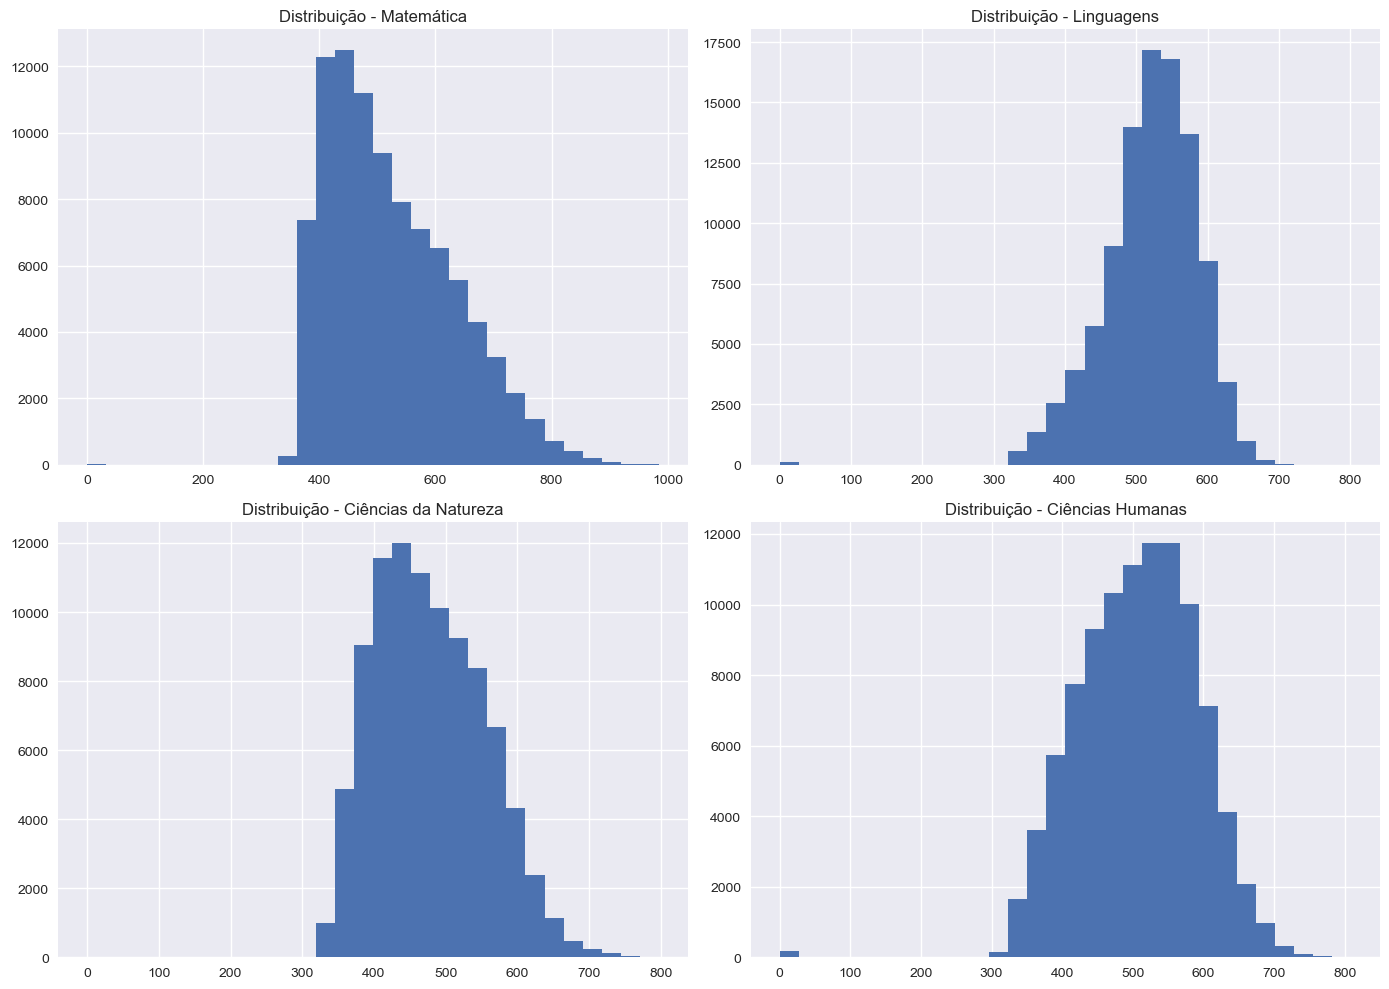

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(mt, bins=30)
axes[0, 0].set_title("Distribuição - Matemática")

axes[0, 1].hist(lc, bins=30)
axes[0, 1].set_title("Distribuição - Linguagens")

axes[1, 0].hist(cn, bins=30)
axes[1, 0].set_title("Distribuição - Ciências da Natureza")

axes[1, 1].hist(ch, bins=30)
axes[1, 1].set_title("Distribuição - Ciências Humanas")

plt.tight_layout()
plt.show()

---
## Boxplots

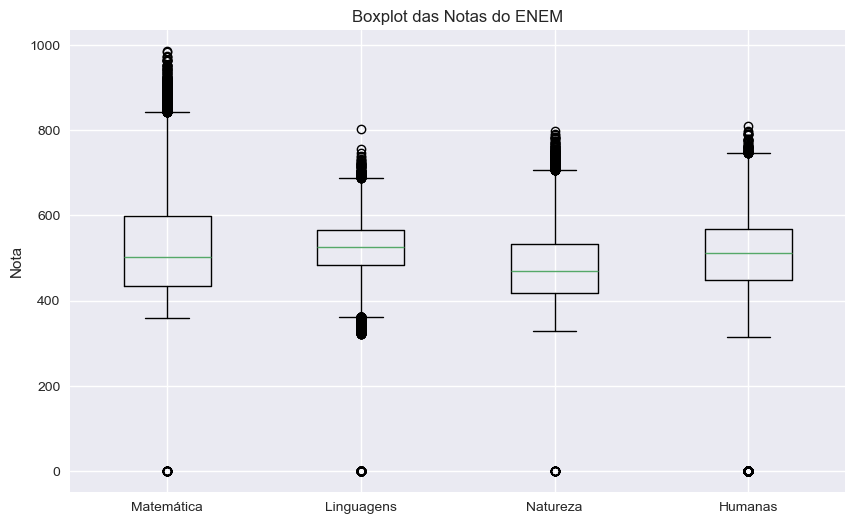

In [14]:
plt.figure(figsize=(10, 6))
plt.boxplot(
    [mt, lc, cn, ch],
    tick_labels=["Matemática", "Linguagens", "Natureza", "Humanas"]
)
plt.title("Boxplot das Notas do ENEM")
plt.ylabel("Nota")
plt.show()

## 📊 Análise das Distribuições das Notas do ENEM

A partir da visualização dos histogramas das quatro áreas do conhecimento, é possível extrair algumas interpretações estatísticas relevantes.

---

### 📈 Forma das Distribuições

De maneira geral, todas as provas apresentam distribuição aproximadamente unimodal, com maior concentração de candidatos entre 400 e 600 pontos.

No entanto, há diferenças importantes:

- **Matemática** apresenta leve assimetria positiva (cauda mais longa à direita), indicando presença de candidatos com desempenho muito elevado que puxam a média para cima.
- **Ciências da Natureza** também demonstra leve assimetria à direita, embora menos acentuada que Matemática.
- **Linguagens** apresenta comportamento mais próximo da simetria, com concentração mais centralizada.
- **Ciências Humanas** demonstra leve assimetria negativa (cauda discretamente maior à esquerda), coerente com a mediana superior à média observada anteriormente.

Esses padrões confirmam a análise de média vs mediana realizada anteriormente.

---

### 📦 Dispersão (Inferência via Histogramas e Boxplots)

Com base no espalhamento visual:

- **Matemática apresenta maior variabilidade**, com notas se distribuindo em uma faixa mais ampla (aproximadamente 350 a 950).
- **Natureza** também apresenta dispersão considerável, mas inferior à de Matemática.
- **Linguagens e Humanas** mostram distribuição mais concentrada, indicando menor variabilidade relativa.

É razoável inferir que o boxplot de Matemática apresentará maior amplitude interquartil e maior extensão de whiskers, enquanto Linguagens e Humanas devem apresentar caixas mais compactas.

---

### 🎯 Conclusão Estatística

As provas não possuem comportamento estatístico homogêneo:

- Matemática se destaca pela maior dispersão e presença de notas altas extremas.
- Linguagens apresenta distribuição mais concentrada e simétrica.
- Humanas tende a apresentar mediana superior à média, sugerindo leve assimetria à esquerda.
- Natureza ocupa posição intermediária em termos de dispersão.

Essas diferenças indicam que análises comparativas futuras (por sexo ou tipo de escola) devem considerar as características individuais de cada prova.
